# Tabulate tracking task data & kinematics

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime
import json

import aopy
import aopy.data.bmi3d as bmi3d
import aopy.data.db as db
plt.rcParams['font.size'] = '16'

In [17]:
preproc_dir = '/data/preprocessed/'
db.BMI3D_DBNAME = 'booth' # for in-cage data, use 'tablet'

# load task codes
task_codes = aopy.data.bmi3d.load_bmi3d_task_codes()

# set constants
samplerate = 120

## Tabulate experiment data

In [11]:
# set subject and range of dates to look up
subject = 'beignet'
task_date = (date.fromisoformat('2023-06-13'), date.fromisoformat('2023-06-24'))

# look up sessions (aka entries) of subject within date range
entries = db.lookup_sessions(subject=subject, date=task_date, project='manual control', task_desc='tracking task')
display(entries)

# sort entries into lists of important metadata
subjects, te_ids, te_dates = db.list_entry_details(entries)

[2023-06-13 14:29:37.570000: beignet on tracking task, id=9701,
 2023-06-13 14:49:06.959000: beignet on tracking task, id=9702,
 2023-06-13 14:55:33.866000: beignet on tracking task, id=9703,
 2023-06-14 13:39:04.384000: beignet on tracking task, id=9717,
 2023-06-14 13:50:40.366000: beignet on tracking task, id=9718,
 2023-06-14 13:53:52.918000: beignet on tracking task, id=9719,
 2023-06-15 13:08:24.838000: beignet on tracking task, id=9723,
 2023-06-15 13:19:57.469000: beignet on tracking task, id=9724,
 2023-06-15 13:31:18.419000: beignet on tracking task, id=9725,
 2023-06-16 13:53:07.923000: beignet on tracking task, id=9728,
 2023-06-16 14:05:50.244000: beignet on tracking task, id=9729,
 2023-06-16 14:08:57.072000: beignet on tracking task, id=9730,
 2023-06-17 13:40:35.067000: beignet on tracking task, id=9734,
 2023-06-17 13:52:16.907000: beignet on tracking task, id=9735,
 2023-06-17 13:55:26.072000: beignet on tracking task, id=9736,
 2023-06-18 13:34:55.077000: beignet on 

In [30]:
# tabulate data across entries into a df where rows = trials
metadata = [
    'features', 'scale', 'rotation', 'exp_rotation', 'offset',
    'trajectory_amplitude', 'disturbance_amplitude', 'cursor_radius', 'target_radius',
    'tracking_out_time'  
]
df = bmi3d.tabulate_behavior_data_tracking_task(preproc_dir, subjects, te_ids, te_dates, metadata)
df.head()

  0%|          | 0/33 [00:00<?, ?it/s]

,subject,te_id,date,event_codes,event_times,reward,penalty,features,scale,rotation,...,sequence_params,ref_freqs,dis_freqs,trial_initiated,hold_start_time,hold_completed,tracking_start_time,tracking_end_time,trajectory_start_time,trajectory_end_time
0,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[6.79096, 7.24928, 7.45828, 11.7332, 12.1748, ...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,"{""nblocks"": 1, ""ntrials"": 500, ""time_length"": ...","[0.1, 0.25, 0.55, 0.85]","[0.15, 0.35, 0.65, 0.95]",True,7.24928,True,7.45828,30.47444,8.95828,28.97444
1,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[33.091, 33.09912, 33.30768, 40.55796, 41.2824...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,"{""nblocks"": 1, ""ntrials"": 500, ""time_length"": ...","[0.15, 0.35, 0.65, 0.95]","[0.1, 0.25, 0.55, 0.85]",True,33.09912,True,33.30768,56.34080,34.80768,54.84080
2,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[58.95804, 59.224, 59.433, 60.63292, 61.01628,...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,"{""nblocks"": 1, ""ntrials"": 500, ""time_length"": ...","[0.1, 0.25, 0.55, 0.85]","[0.15, 0.35, 0.65, 0.95]",True,59.22400,True,59.43300,82.48240,60.93300,80.98240
3,beignet,9701,2023-06-13,"[16, 2, 64, 239]","[85.09884, 85.44052, 85.62388, 86.94212]",False,True,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,"{""nblocks"": 1, ""ntrials"": 500, ""time_length"": ...","[0.15, 0.35, 0.65, 0.95]","[0.1, 0.25, 0.55, 0.85]",True,85.44052,False,NaN,NaN,NaN,NaN
4,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[88.64056, 89.09056, 89.29948, 91.6656, 91.916...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,"{""nblocks"": 1, ""ntrials"": 500, ""time_length"": ...","[0.15, 0.35, 0.65, 0.95]","[0.1, 0.25, 0.55, 0.85]",True,89.09056,True,89.29948,112.35728,90.79948,110.85728


In [31]:
# add additional metadata related to visuomotor perturbations (note: non-perturbation sessions will have NaN values for these params)
param_names = ['pertubation_rotation', 'init_rotation_y', 'final_rotation_y', 'delta_rotation_y', 'trials_per_increment']
param_funcs = [lambda x: x.get_task_param(name) for name in param_names]

db.add_metadata_columns(df, entries, param_names, param_funcs)
df.head()

,subject,te_id,date,event_codes,event_times,reward,penalty,features,scale,rotation,...,hold_completed,tracking_start_time,tracking_end_time,trajectory_start_time,trajectory_end_time,pertubation_rotation,init_rotation_y,final_rotation_y,delta_rotation_y,trials_per_increment
0,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[6.79096, 7.24928, 7.45828, 11.7332, 12.1748, ...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,True,7.45828,30.47444,8.95828,28.97444,6.0,6.0,6.0,6.0,6.0
1,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[33.091, 33.09912, 33.30768, 40.55796, 41.2824...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,True,33.30768,56.34080,34.80768,54.84080,6.0,6.0,6.0,6.0,6.0
2,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[58.95804, 59.224, 59.433, 60.63292, 61.01628,...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,True,59.43300,82.48240,60.93300,80.98240,6.0,6.0,6.0,6.0,6.0
3,beignet,9701,2023-06-13,"[16, 2, 64, 239]","[85.09884, 85.44052, 85.62388, 86.94212]",False,True,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,False,NaN,NaN,NaN,NaN,6.0,6.0,6.0,6.0,6.0
4,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[88.64056, 89.09056, 89.29948, 91.6656, 91.916...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,True,89.29948,112.35728,90.79948,110.85728,6.0,6.0,6.0,6.0,6.0


In [37]:
# add even more metadata by extracting info from the 'sequence_params' column
df['sequence_params'] = [json.loads(df.iloc[i]['sequence_params']) for i in range(len(df))] # convert 'sequence_params' from string to dict so it's easier to use

time_length = [df.sequence_params[i]['time_length'] for i in range(len(df))]
ramp = [df.sequence_params[i]['ramp'] for i in range(len(df))]
ramp_down = [df.sequence_params[i]['ramp_down'] for i in range(len(df))]

df['time_length'] = time_length
df['ramp'] = ramp
df['ramp_down'] = ramp_down
df.head()

,subject,te_id,date,event_codes,event_times,reward,penalty,features,scale,rotation,...,trajectory_start_time,trajectory_end_time,pertubation_rotation,init_rotation_y,final_rotation_y,delta_rotation_y,trials_per_increment,time_length,ramp,ramp_down
0,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[6.79096, 7.24928, 7.45828, 11.7332, 12.1748, ...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,8.95828,28.97444,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
1,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[33.091, 33.09912, 33.30768, 40.55796, 41.2824...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,34.80768,54.84080,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
2,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[58.95804, 59.224, 59.433, 60.63292, 61.01628,...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,60.93300,80.98240,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
3,beignet,9701,2023-06-13,"[16, 2, 64, 239]","[85.09884, 85.44052, 85.62388, 86.94212]",False,True,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,NaN,NaN,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
4,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[88.64056, 89.09056, 89.29948, 91.6656, 91.916...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,90.79948,110.85728,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5


## Filter tabulated data

In [40]:
# make new df containing only rewarded trials
reward_df = df[df['reward']==True]
reward_df.head()

,subject,te_id,date,event_codes,event_times,reward,penalty,features,scale,rotation,...,trajectory_start_time,trajectory_end_time,pertubation_rotation,init_rotation_y,final_rotation_y,delta_rotation_y,trials_per_increment,time_length,ramp,ramp_down
0,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[6.79096, 7.24928, 7.45828, 11.7332, 12.1748, ...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,8.95828,28.97444,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
1,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[33.091, 33.09912, 33.30768, 40.55796, 41.2824...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,34.80768,54.84080,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
2,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[58.95804, 59.224, 59.433, 60.63292, 61.01628,...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,60.93300,80.98240,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
4,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[88.64056, 89.09056, 89.29948, 91.6656, 91.916...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,90.79948,110.85728,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
5,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[114.97368, 114.98204, 115.19068, 116.4076, 11...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,116.69068,136.71528,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5


In [55]:
# make new df containing only trials that ended in a tracking out penalty
tracking_out_df = df[[task_codes['OTHER_PENALTY'] in df.event_codes[i] for i in range(len(df))]]
tracking_out_df.head()

,subject,te_id,date,event_codes,event_times,reward,penalty,features,scale,rotation,...,trajectory_start_time,trajectory_end_time,pertubation_rotation,init_rotation_y,final_rotation_y,delta_rotation_y,trials_per_increment,time_length,ramp,ramp_down
10,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[199.44816, 199.73984, 199.94872, 200.18216, 2...",False,True,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,201.44872,206.32364,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
15,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[313.88392, 314.15588, 314.36472, 315.73988, 3...",False,True,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,315.86472,333.38136,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
17,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[339.66408, 339.88904, 340.09812, 341.16664, 3...",False,True,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,341.59812,357.12304,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
21,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[393.9138, 393.98052, 394.1894, 394.56444, 394...",False,True,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,395.68940,403.14032,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
22,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 79, 239]","[406.14708, 409.5304, 409.73932, 411.52264, 41...",False,True,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,411.23932,415.23216,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5


## Get kinematic segments using tabulated data

In [57]:
# specify columns from the df to use for segmenting kinematics
start_event = 'trajectory_start_time'
end_event = 'trajectory_end_time'

# get cursor & target kinematics for rewarded trials
cursor_segments_reward = bmi3d.tabulate_kinematic_data(
    preproc_dir, reward_df['subject'], reward_df['te_id'], reward_df['date'], 
    reward_df[start_event], reward_df[end_event], 
    datatype='cursor', samplerate=samplerate, upsamplerate=samplerate
)

target_segments_reward = bmi3d.tabulate_kinematic_data(
    preproc_dir, reward_df['subject'], reward_df['te_id'], reward_df['date'], 
    reward_df[start_event], reward_df[end_event], 
    datatype='reference', samplerate=samplerate, upsamplerate=samplerate
)

# get cursor & target kinematics for trials that ended in a tracking out penalty
cursor_segments_trackout = bmi3d.tabulate_kinematic_data(
    preproc_dir, tracking_out_df['subject'], tracking_out_df['te_id'], tracking_out_df['date'], 
    tracking_out_df[start_event], tracking_out_df[end_event], 
    datatype='cursor', samplerate=samplerate, upsamplerate=samplerate
)

target_segments_trackout = bmi3d.tabulate_kinematic_data(
    preproc_dir, tracking_out_df['subject'], tracking_out_df['te_id'], tracking_out_df['date'], 
    tracking_out_df[start_event], tracking_out_df[end_event], 
    datatype='reference', samplerate=samplerate, upsamplerate=samplerate
)

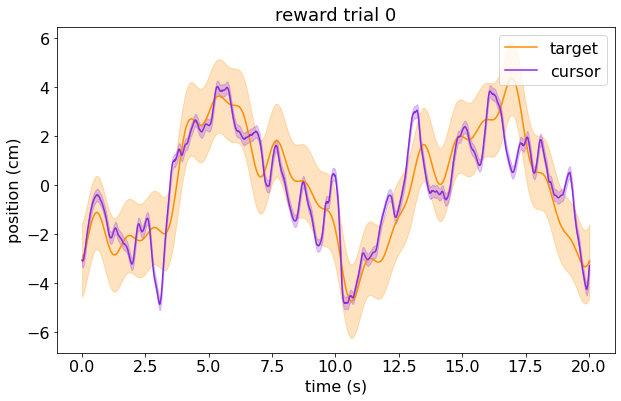

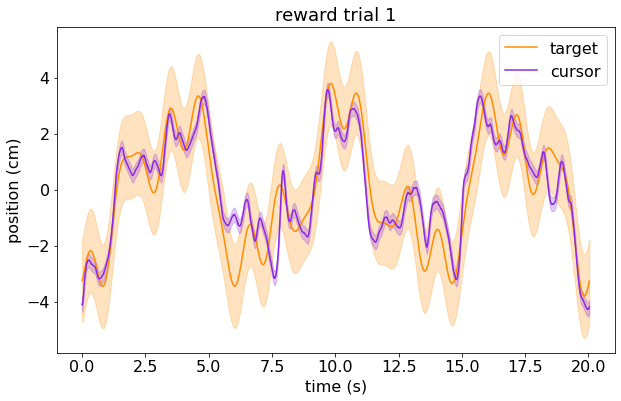

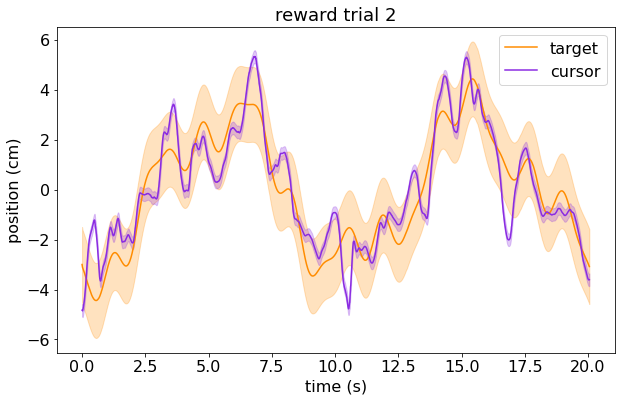

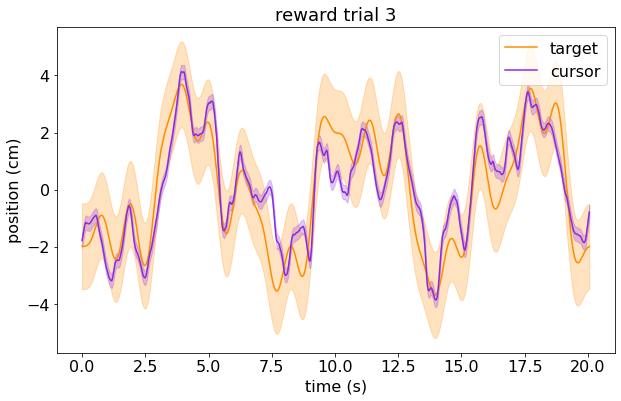

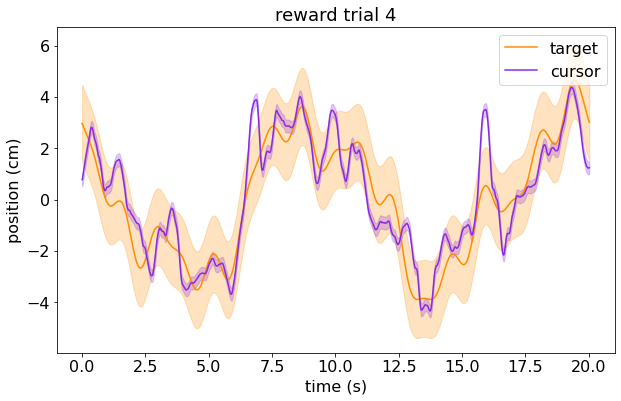

In [113]:
# plot kinematics for an example rewarded trial
y_idx = 1 # tracking task signals are 1D, so only have non-zero y-values

for trial_idx in range(5):
    plt.figure(figsize=(10,6))
    plt.title(f'reward trial {trial_idx}', fontsize=18)
    t = np.linspace(0, target_segments_reward[trial_idx].shape[0]/samplerate, target_segments_reward[trial_idx].shape[0])
    plt.plot(t, target_segments_reward[trial_idx][:,y_idx], color='darkorange', label='target')
    plt.plot(t, cursor_segments_reward[trial_idx][:,y_idx], color='blueviolet', label='cursor')
    plt.fill_between(t, target_segments_reward[trial_idx][:,y_idx] - reward_df.target_radius.values[trial_idx], 
                        target_segments_reward[trial_idx][:,y_idx] + reward_df.target_radius.values[trial_idx], color='darkorange', alpha=.25)
    plt.fill_between(t, cursor_segments_reward[trial_idx][:,y_idx] - reward_df.cursor_radius.values[trial_idx], 
                        cursor_segments_reward[trial_idx][:,y_idx] + reward_df.cursor_radius.values[trial_idx], color='blueviolet', alpha=.25)
    plt.xlabel('time (s)')
    plt.ylabel('position (cm)')
    plt.legend(loc='upper right');

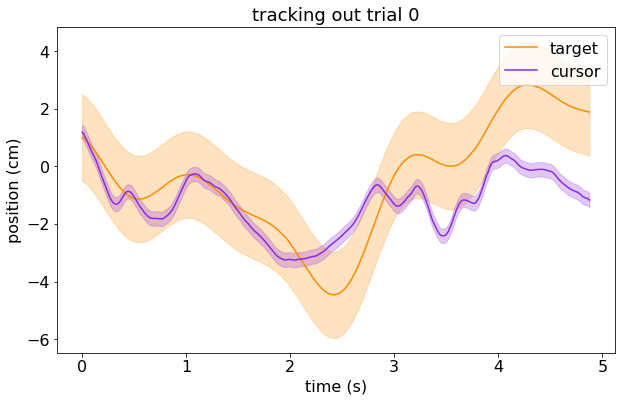

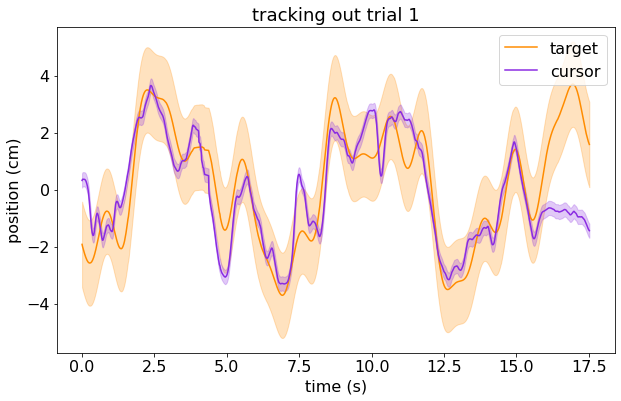

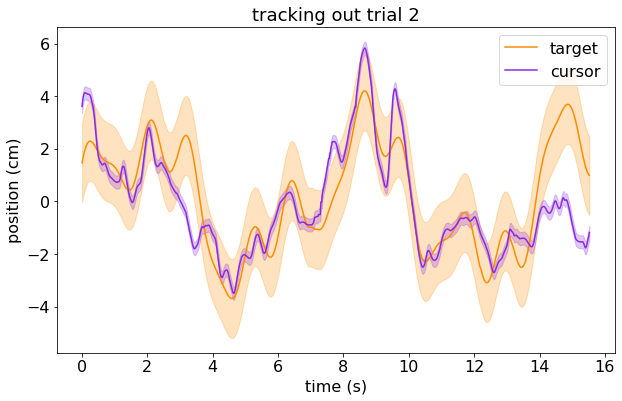

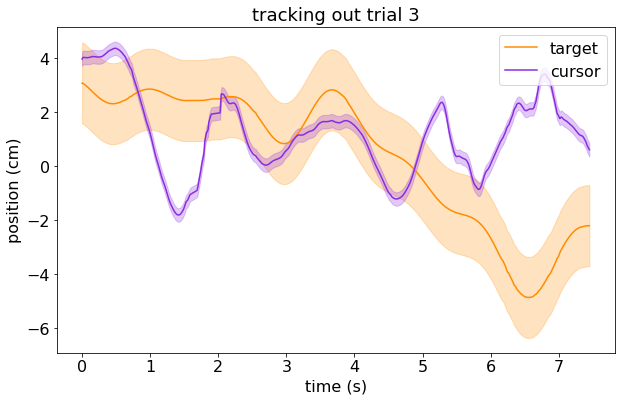

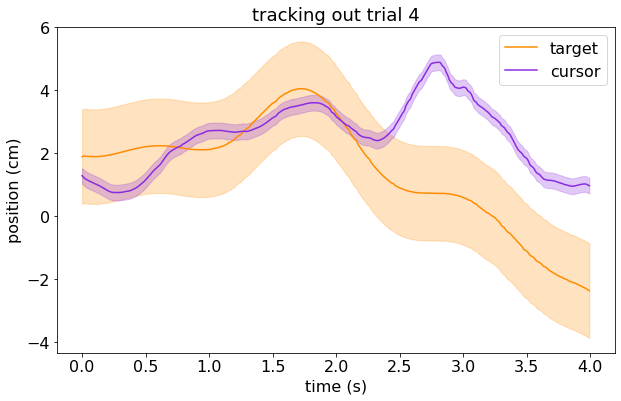

In [114]:
# plot kinematics for an example penalty trial
y_idx = 1 # tracking task signals are 1D, so only have non-zero y-values

for trial_idx in range(5):
    plt.figure(figsize=(10,6))
    plt.title(f'tracking out trial {trial_idx}', fontsize=18)
    t = np.linspace(0, target_segments_trackout[trial_idx].shape[0]/samplerate, target_segments_trackout[trial_idx].shape[0])
    plt.plot(t, target_segments_trackout[trial_idx][:,y_idx], color='darkorange', label='target')
    plt.plot(t, cursor_segments_trackout[trial_idx][:,y_idx], color='blueviolet', label='cursor')
    plt.fill_between(t, target_segments_trackout[trial_idx][:,y_idx] - tracking_out_df.target_radius.values[trial_idx], 
                        target_segments_trackout[trial_idx][:,y_idx] + tracking_out_df.target_radius.values[trial_idx], color='darkorange', alpha=.25)
    plt.fill_between(t, cursor_segments_trackout[trial_idx][:,y_idx] - tracking_out_df.cursor_radius.values[trial_idx], 
                        cursor_segments_trackout[trial_idx][:,y_idx] + tracking_out_df.cursor_radius.values[trial_idx], color='blueviolet', alpha=.25)
    plt.xlabel('time (s)')
    plt.ylabel('position (cm)')
    plt.legend(loc='upper right');